In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from childes_mi.utils.paths import PHONBANK_DFS
from childes_mi.utils.general import flatten

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
transcript_df = pd.read_pickle(PHONBANK_DFS/'transcript_df.pickle')
transcript_df['dataset'] = [i.split('_')[2] for i in transcript_df.transcript_root_name.values]
transcript_df[:3]

,transcript_id,transcript_root_name,corpus,version,date,language,media,xml_loc,dataset
0,2M-AA,corpora_Spanish_Vivar_Santiago_2M-AA,Santiago,PB1.2,2016-11-06,spa,Vivar/Santiago/2M-AA.wav,/mnt/cube/tsainbur/Projects/github_repos/child...,Vivar
0,4M-MB,corpora_Spanish_Vivar_Santiago_4M-MB,Santiago,PB1.2,2016-11-20,spa,Vivar/Santiago/4M-MB.wav,/mnt/cube/tsainbur/Projects/github_repos/child...,Vivar
0,2A-IB,corpora_Spanish_Vivar_Santiago_2A-IB,Santiago,PB1.2,2016-11-08,spa,Vivar/Santiago/2A-IB.wav,/mnt/cube/tsainbur/Projects/github_repos/child...,Vivar


In [5]:
datasets_to_use = ['Providence', # 0;8-3;3  spontaneous interactions with their parents (usually their mothers) at home https://phonbank.talkbank.org/access/Eng-NA/Providence.html
               'Davis', # 0;7-3;0 natural interactions and situations that occurred in their daily lives https://phonbank.talkbank.org/access/Eng-NA/Davis.html 
               'Goad',  # 0;8-2;11 in their homes in a naturalistic setting https://phonbank.talkbank.org/access/Eng-NA/Goad.html
              ] 

In [6]:
dataset_mask = np.array([i in datasets_to_use for i in transcript_df.dataset.values])
transcript_df = transcript_df[dataset_mask]

In [7]:
transcript_df = transcript_df[transcript_df.language == 'eng']

In [8]:
len(transcript_df)

1032

In [9]:
participants = list((PHONBANK_DFS / 'participants').glob('*.pickle'))
transcripts = list((PHONBANK_DFS / 'transcripts').glob('*.pickle'))
participants[:2], transcripts[:2]

([PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/processed/phonbank/participants/corpora_Eng-NA_ComptonPater_Julia_021001.pickle'),
  PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/processed/phonbank/participants/corpora_Eng-NA_Davis-CDI_Ben-WG_Ben-1_10_08.pickle')],
 [PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/processed/phonbank/transcripts/corpora_Eng-NA_Davis_Jodie_010127.pickle'),
  PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/processed/phonbank/transcripts/corpora_French_Yamaguchi_Yamaguchi_040326.pickle')])

In [10]:
len(transcripts), len(participants)

(6608, 6608)

In [11]:
all_transcript_df = pd.concat([pd.read_pickle(i) for i in tqdm(transcripts)])
len(all_transcript_df)

2421443

In [12]:
all_transcript_df[:3]

,record_id,speaker,orthography,start_time_ms,duration_ms,ipa_model,ipa_actual,transcript_id,xml_loc
0,0b150e30-86f5-445a-913d-6bc951a5eef1,CHI,"[all, gone]",0.0,0.0,"[None, None]","[a, ga]",010127,/mnt/cube/tsainbur/Projects/github_repos/child...
0,46d7609e-7375-40ae-8bc8-fd9944fa43b4,CHI,[baby],0.0,0.0,[None],[dɛdi],010127,/mnt/cube/tsainbur/Projects/github_repos/child...
0,7edecb25-3aa0-448c-8134-74160a8d50bf,CHI,[bottle],0.0,0.0,[None],[baba],010127,/mnt/cube/tsainbur/Projects/github_repos/child...


In [13]:
all_participant_df = pd.concat([pd.read_pickle(i) for i in tqdm(participants)])
len(all_participant_df)

6608

In [14]:
all_participant_df[:3]

,participant_id,role,name,age,birthday,sex,language,transcript_id,xml_loc
0,CHI,Target Child,Julia,P2Y10M1DT0H0M0S,NaN,female,eng,021001,/mnt/cube/tsainbur/Projects/github_repos/child...
0,CHI,Target Child,Ben,P1Y10M8DT0H0M0S,NaN,male,eng,Ben-1_10_08,/mnt/cube/tsainbur/Projects/github_repos/child...
0,CHI,Target Child,Théophile,P3Y5M11DT0H0M0S,2005-07-04,male,fra,030511,/mnt/cube/tsainbur/Projects/github_repos/child...


In [15]:
import re
def convert_age(age_year):
    "Caclculate age in months from a string in CHILDES format"
    m = re.match("P(\d+)Y(\d+)M?(\d?\d?)D?", age_year)
    age_month = int(m.group(1)) * 12 + int(m.group(2))
    try:
        if int(m.group(3)) > 15:
            age_month += 1
    # some corpora don't have age information?
    except ValueError as e:
        pass
    return age_month

In [16]:
ages = [convert_age(age) if type(age) == str else np.nan for age in tqdm(all_participant_df.age.values) ]

Text(0.5, 1.0, 'age of participant')

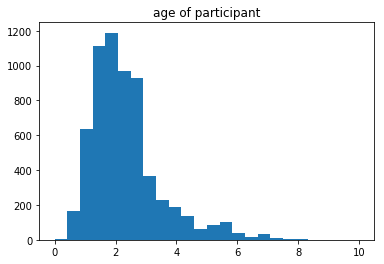

In [17]:
fig, ax = plt.subplots()
ax.hist(np.array(ages)/12, bins=np.linspace(0,10,25));
ax.set_title('age of participant')

### Create a phone dataset of english 

In [18]:
all_participant_df.role.unique()

array(['Target Child', 'Target Adult', 'Subject', 'Investigator', 'Child',
       'Mother', 'Father', 'Target_Child', 'Adult', 'Caretaker', 'Sister',
       'Aunt', 'Grandmother'], dtype=object)

In [19]:
def get_transcript_info(transcript_subset, participant_row):
    """ from a transcript, create a pandas dataframe of orthography/phones
    """

    # for participant in dataset
    participant_ts = transcript_subset[
        transcript_subset.speaker == participant_row.participant_id
    ]
    
    if type(participant_row.age) is not str:
        age = np.nan
    else:
        age = round(convert_age(participant_row.age) / 12, 3)

    phone_df = pd.DataFrame(
        [[
            participant_row.name,
            participant_row.transcript_id,
            age,
            dataset,
            participant_row.language,
            participant_row.sex,
            participant_ts.ipa_actual.values,
            participant_ts.orthography.values,
            participant_row.xml_loc,
        ]],
        columns=[
            "name",
            "transcript_id",
            "age",
            "dataset",
            "language",
            "sex",
            "phones",
            "orthography",
            "xml_loc",
        ],
    )

    return phone_df

In [20]:
#def get_transcript_info(transcript_subset, participant_row):
#    return

In [21]:
from joblib.externals.loky import set_loky_pickler
from joblib import parallel_backend
from joblib import Parallel, delayed
from joblib import wrap_non_picklable_objects

In [22]:
all_transcript_df['xml_str'] = [i.as_posix() for i in all_transcript_df.xml_loc]
all_participant_df['xml_str'] = [i.as_posix() for i in all_participant_df.xml_loc]
transcript_df['xml_str'] = [i.as_posix() for i in transcript_df.xml_loc]

In [23]:
target_child_df = all_participant_df[all_participant_df.role == 'Target Child']

In [24]:
phone_df = []
with Parallel(n_jobs=-1) as parallel:
    for dataset in tqdm(datasets_to_use):
        # subset dataset
        ds_trdf = transcript_df[transcript_df.dataset == dataset]
        print("~~~~~~~~~~~~~~~~~~~~", dataset, "~~~~~~~~~~~~~~~~~~~~")
        # for transcripts in dataset
        phone_df.append(
            pd.concat(
                parallel(
                    delayed(get_transcript_info)(
                        transcript_subset=all_transcript_df[
                            all_transcript_df.xml_str == transcript_row.xml_str
                        ],
                        participant_row=target_child_df[
                            target_child_df.xml_str == transcript_row.xml_str
                        ].iloc[0],
                    )
                    for idx, transcript_row in tqdm(
                        ds_trdf.iterrows(), total=len(ds_trdf)
                    )
                )
            )
        )
phone_df = pd.concat(phone_df)

~~~~~~~~~~~~~~~~~~~~ Providence ~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~ Davis ~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~ Goad ~~~~~~~~~~~~~~~~~~~~


In [27]:
phone_df[:3]

,name,transcript_id,age,dataset,language,sex,phones,orthography,xml_loc
0,0,020926,2.833,Providence,eng,male,"[[ˈhi, ˈhæ, rəs], [ˈhi, ˈhæ, rəs], [ˈkævəʔ, ˈp...","[[[can, I], have, this], [[can, I], have, this...",/mnt/cube/tsainbur/Projects/github_repos/child...
0,0,030006,3.000,Providence,eng,male,"[[*, haʊ, ˈbaʊ, *, ɪ, ˈdeɪ, mætʃ], [deɪ, ˈmætʃ...","[[xxx, how, <a>bout, xxx, if, they, match], [t...",/mnt/cube/tsainbur/Projects/github_repos/child...
0,0,011117,2.000,Providence,eng,male,"[[None], [None], [None], [hɪ, ˈmi], [ˈbu], [No...","[[xxx], [xxx], [xxx], [help, me], [bowl], [xxx...",/mnt/cube/tsainbur/Projects/github_repos/child...


In [28]:
len(phone_df)

1032

In [29]:
PHONBANK_DFS

PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/processed/phonbank')

In [30]:
phone_df.to_pickle(PHONBANK_DFS/'phone_df.pickle')